# Comparison of Regression Machine Learning Algorithms of Explaining Students' Academic Performance

### Background

What aspects of schooling and parenting are important? What factors are associated with school performance? Will alcohol intake directly affect a student’s academic performance? For many of us, adolescence is the point when we become independent person and make crucial decisions on our own, and when we may catch opportunities for higher education and successful career. 
 
In this project, I would like to identify the factors among a student’s socioeconomic status, study attitude, school that impact the students’ school performance most, especially to check if alcohol use will affect students’ grades, with support of real-world data.

I will also investigate machine learning techniques (KNNs, SVR, Linear Regression and Trees) for regression problems.

### Data

The data is collected by Fabio Pagnotta and Hossain Mohammad Amran3,4 from University of Camerino. The data can be accessed through UCI Machine Learning Repository:
 
https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION
 
The data covers alcohol usage of a group of students under secondary education in Portugal along with their social, gender, study time, and school performance information. The dataset consists of two subdatasets with contributes for both Math (student-mat.csv) and Portuguese language (tudent-por.csv) classes. Each dataset has 32 variables with detailed explanation in “student.txt”. There are 395 students for Math class and 649 students for Portuguese, of which 382 students took both.

 Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
    2 sex - student's sex (binary: "F" - female or "M" - male)
    3 age - student's age (numeric: from 15 to 22)
    4 address - student's home address type (binary: "U" - urban or "R" - rural)
    5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
    6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
    7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    12 guardian - student's guardian (nominal: "mother", "father" or "other")
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    16 schoolsup - extra educational support (binary: yes or no)
    17 famsup - family educational support (binary: yes or no)
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19 activities - extra-curricular activities (binary: yes or no)
    20 nursery - attended nursery school (binary: yes or no)
    21 higher - wants to take higher education (binary: yes or no)
    22 internet - Internet access at home (binary: yes or no)
    23 romantic - with a romantic relationship (binary: yes or no)
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)
    30 absences - number of school absences (numeric: from 0 to 93)

    These grades are related with the course subject, Math or Portuguese:
    31 G1 - first period grade (numeric: from 0 to 20)
    31 G2 - second period grade (numeric: from 0 to 20)
    32 G3 - final grade (numeric: from 0 to 20, output target)

Import modules and load data.

In [1]:
#Import modules
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import cross_validation
from sklearn import datasets
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
import statsmodels.tools
# Load "student-mat.csv" as Mdf and "student-por.csv" as Pdf.
Mdf = pd.read_csv('student-mat.csv',sep=';')
Pdf = pd.read_csv('student-por.csv',sep=';')

#dimention of datasets
print('Shape of Mdf:{}'.format(Mdf.shape))
print('Shape of Pdf:{}'.format(Pdf.shape))

Shape of Mdf:(395, 33)
Shape of Pdf:(649, 33)


/Users/jinghao/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jinghao/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Data Preprocessing and Exploratory Analysis

To get an idea of distribution of grades, I plot histograms of G1, G2, and G3, by each courses. 

There is one peak for Math class that appears around 10 to 11, whereas in Portuguese class, the peak is at the same score range and it's followed by a second peak at 12.5. The distribution tells us it's more difficult to get higher scores in Math class.

G1, G2, and G3 have similar distribution shapes. I will use G3, the final grade, to represent students' school performance.

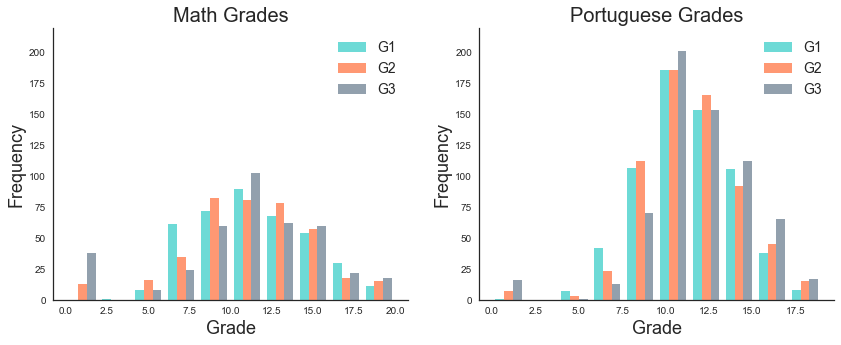

In [2]:
fig = plt.figure(figsize=(14,5))
plt.style.use('seaborn-white')
ax1 = plt.subplot(121)
plt.hist([Mdf['G1'], Mdf['G2'], Mdf['G3']], label=['G1', 'G2', 'G3'], color=['#48D1CC', '#FF7F50', '#778899' ], alpha=0.8)
plt.legend(fontsize=14)
plt.xlabel('Grade', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Math Grades', fontsize=20)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.ylim(0,220)

ax2 = plt.subplot(122)
plt.hist([Pdf['G1'], Pdf['G2'], Pdf['G3']], label=['G1', 'G2', 'G3'], color=['#48D1CC', '#FF7F50', '#778899' ], alpha=0.8)
plt.legend(fontsize=14)
plt.xlabel('Grade', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Portuguese Grades', fontsize=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.ylim(0,220)

plt.show()

In order to check if grades from two classes are comparable, I plot final score (G3) of Portuguese over Math of each student who took both classes. The upward slope shows that students with higher math score also tend to have higher Portuguese score. By observing the positive correlation, an OLS regression analysis is followed. With R-squared of only 0.231, the model shows weak robustness. Therefore, instead of combining two datasets, I am going to build individual models for each dataset, and see if we can draw any conclusions in common. The disadvantage is that the sample sizes are relatively small (395 for Math, and 649 for Portuguese), but in this way I hope to improve accuracy of the models.

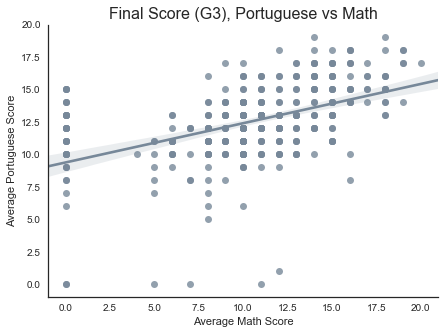

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     114.0
Date:                Tue, 28 Nov 2017   Prob (F-statistic):           1.91e-23
Time:                        22:31:08   Log-Likelihood:                -904.09
No. Observations:                 382   AIC:                             1812.
Df Residuals:                     380   BIC:                             1820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3803      0.322     29.119      0.0

In [3]:
#Add column "Subject" that describes which course the student has taken.
Mdf['Subject'] = 'M'
Pdf['Subject'] = 'P'
#Identify students who took both Math and Portuguese classes.
df = pd.merge(Mdf,Pdf,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_M','_P'))
#Update "Subject" with "B", meaning students took both courses.
df['Subject'] = 'B'
#plot of G3, Portuguese over Math
fig = plt.figure(figsize=(7,5))
ax = sns.regplot(df.G3_M, df.G3_P, color='#778899')
ax.set(xlabel='Average Math Score', ylabel='Average Portuguese Score')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Final Score (G3), Portuguese vs Math', fontsize=16)
plt.show()

#OLS regression of final Portuguese score over final Math score.
X = np.array(df.G3_M)
Y = np.array(df.G3_P)
model = sm.OLS(Y, statsmodels.tools.add_constant(X))
results = model.fit()
print(results.summary())

Next, let's create a measure of students' alcohol consumption level at daily average:

    Aalc = (Dalc*5 + Walc*2)/7. 
    (Dalc - workday alcohol consumption; 
     Walc - weekend alcohol consumption)
     
“G1”, “G2”, “Dalc”, and “Walc” will be removed as they are no longer of our interests here. 

In [4]:
#Math dataset
#create Aalc
Mdf.loc[:,'Aalc'] = (Mdf['Dalc']*5 + Mdf['Walc']*2)/7
#remove not interested variables
#"paid" has "no" values for all entries, so we will also drop it.
Mdf = Mdf.drop(['G1', 'G2', 'Dalc', 'Walc', 'paid'], axis=1)

#Repeat the same steps for Portuguese dataset
#create Aalc
Pdf.loc[:,'Aalc'] = (Pdf['Dalc']*5 + Pdf['Walc']*2)/7
#remove not interested variables
Pdf = Pdf.drop(['G1', 'G2', 'Dalc', 'Walc'], axis=1)

From the density plots of Aalc, most students fall in the range of 1-1.5, meaning consume alcohol at very low level. The regplot plots data and a linear regression model fit between two variables, G3 and Aalc. By setting x_bins=5, we can bin Aalc into discrete bins and then estimate the central tendency and a confidence interval. The dots reflect the mean estimate and a confidence interval is drawn. A reverse correlation between G3 and Aalc is reflected through regplots, and Portuguese dataset has stronger relationship.

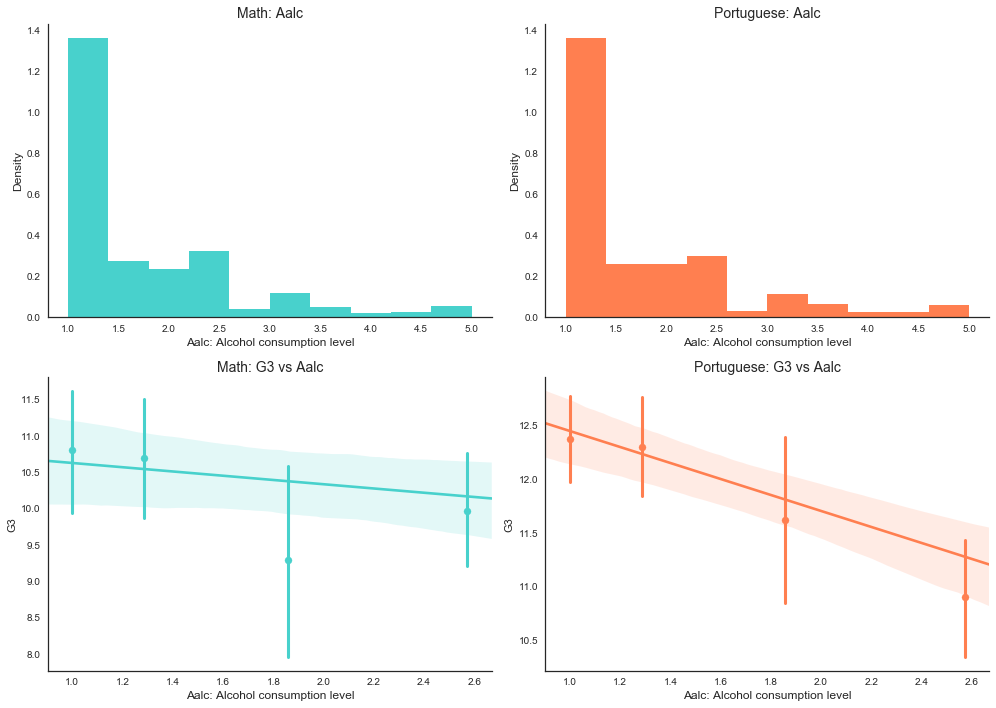

In [5]:
#visualize Aalc
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(221)
plt.hist(Mdf['Aalc'], bins=10, normed=True, color='#48D1CC')
plt.title('Math: Aalc', fontsize=14)
plt.xlabel('Aalc: Alcohol consumption level', fontsize=12)
plt.ylabel('Density', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(222)
plt.hist(Pdf['Aalc'], bins=10, normed=True, color='#FF7F50')
plt.title('Portuguese: Aalc', fontsize=14)
plt.xlabel('Aalc: Alcohol consumption level', fontsize=12)
plt.ylabel('Density', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


ax3 = plt.subplot(223)
sns.regplot(Mdf["Aalc"], Mdf['G3'], x_bins=5, x_estimator=np.mean, color='#48D1CC')
plt.title('Math: G3 vs Aalc', fontsize=14)
plt.xlabel('Aalc: Alcohol consumption level', fontsize=12)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax4 = plt.subplot(224)
sns.regplot(Pdf["Aalc"], Pdf['G3'], x_bins=5, x_estimator=np.mean, color='#FF7F50')
plt.title('Portuguese: G3 vs Aalc', fontsize=14)
plt.xlabel('Aalc: Alcohol consumption level', fontsize=12)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.tight_layout()

I use plot bar plot of count of absences to see how data is distributed. The overall trend is decreasing as count of absences increase. The odds number of counts is significantly low, making a gap between every even number counts. It's an interesting pattern but the dataset does not explain by itself. I anticipate a negative correlation between G3 and Aalc but it's not shown through regplots, probably because of the odds pattern.

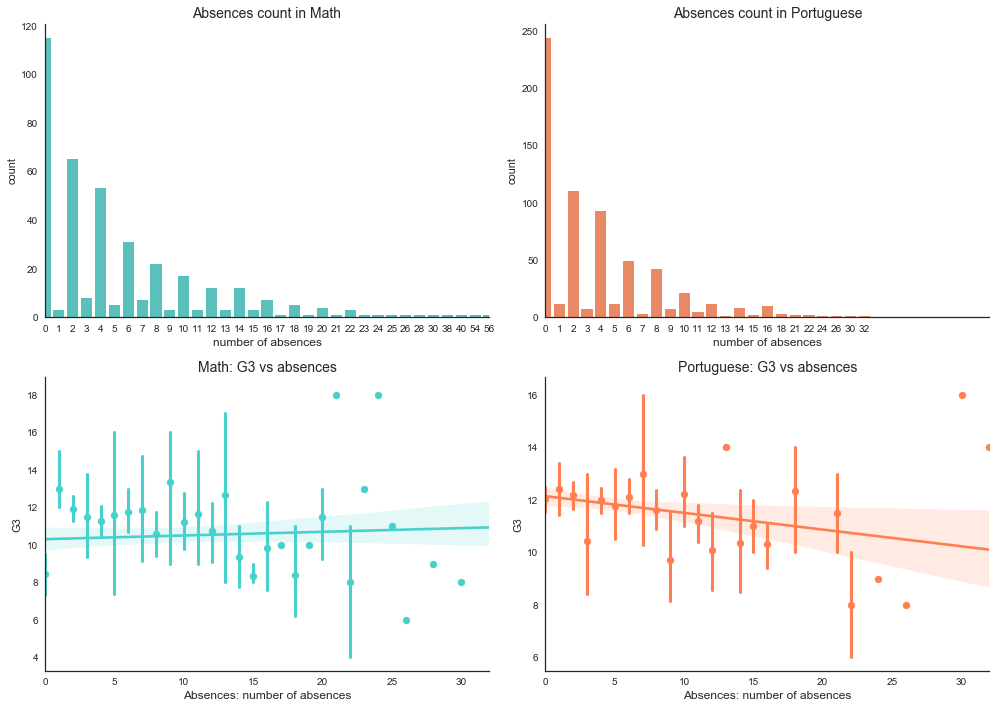

In [6]:
#Visualize absence
fig = plt.figure(figsize=(14,10))

ax1 = plt.subplot(221)
sns.countplot(Mdf['absences'], color='#48D1CC')
plt.title('Absences count in Math', fontsize=14)
plt.xlabel('number of absences', fontsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.xlim((0,32))

ax2 = plt.subplot(222)
sns.countplot(Pdf['absences'], color='#FF7F50')
plt.title('Absences count in Portuguese', fontsize=14)
plt.xlabel('number of absences', fontsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.xlim((0,32))

ax3 = plt.subplot(223)
sns.regplot(Mdf['absences'], Mdf['G3'], x_estimator=np.mean, color='#48D1CC')
plt.title('Math: G3 vs absences', fontsize=14)
plt.xlabel('Absences: number of absences', fontsize=12)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
plt.xlim((0,32))

ax4 = plt.subplot(224)
sns.regplot(Pdf['absences'], Pdf['G3'], x_estimator=np.mean, color='#FF7F50')
plt.title('Portuguese: G3 vs absences', fontsize=14)
plt.xlabel('Absences: number of absences', fontsize=12)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
plt.xlim((0,32))

plt.tight_layout()

### Data Prparation for Modeling
The target variable (y) is G3. I include all rest variables as predictors (X). 
 
For binary variables from the original datasets, I replaced “yes”/”no” values with 1/0. The converted variables are listed in below.
school - student's school (1 - Gabriel Pereira or 0 - Mousinho da Silveira)

    sex - student's sex (1 - female or 0 - male).
    address - student's home address type (1 - urban or 0 - rural).
    famsize - family size (1 - less or equal to 3 or 0 - greater than 3).
    Pstatus - parent's cohabitation status (1- living together or 0 - apart).
    schoolsup - extra educational support (1- yes or 0 - no).
    famsup - family educational support (1- yes or 0 - no).
    activities - extra-curricular activities (1- yes or 0 - no).
    nursery - attended nursery school (1- yes or 0 - no).
    higher - wants to take higher education (1- yes or 0 - no).
    internet - Internet access at home (1- yes or 0 - no).
    romantic - with a romantic relationship (1- yes or 0 - no).
    paid - extra paid classes within the course subject (1-yes or 0-no).
 
Next, I dummy coded any nominal categorical variables in X. This will improve model performance by eliminating any relationships form the statistical stories of nominal variables. 
Nominal variables are listed as the following. 
 
    Subject - The course a student was taking. (“M” - Math, “P” - Portuguese, and “B”- both).
    Mjob - mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    Fjob - father's job ( "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    reason - reason to choose this school (close to "home", school "reputation", "course" preference or "other").
    guardian - student's guardian ( "mother", "father" or "other").
    
In the modeling process, I uniformly randomly splitted the data into 70% of training data set and 30% of test data set. The training set will be used to build a predicting model, and the test data set will be used to test model accuracy. The goal is to build a model that is able to generalize from training set to test set as accurately as possible.

In [7]:
#Math
#Identify target variable y and predictor variables X.
ym = Mdf['G3']
Xm = Mdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'Subject', 'Aalc']]
#Convert dummy variables values into 0/1.
Xm.school = Xm['school'].replace(['GP', 'MS'], [1,0])
Xm.sex = Xm['sex'].replace(['F','M'],[1,0])
Xm.address = Xm['address'].replace(['U','R'], [1,0])
Xm.famsize = Xm['famsize'].replace(['LE3','GT3'], [1,0])
Xm.Pstatus = Xm['Pstatus'].replace(['T','A'], [1,0])
Xm.schoolsup = Xm['schoolsup'].replace(['yes','no'],[1,0])
Xm.famsup = Xm['famsup'].replace(['yes','no'],[1,0])
Xm.activities = Xm['activities'].replace(['yes','no'],[1,0])
Xm.nursery = Xm['nursery'].replace(['yes','no'],[1,0])
Xm.higher = Xm['higher'].replace(['yes','no'],[1,0])
Xm.internet = Xm['internet'].replace(['yes','no'],[1,0])
Xm.romantic = Xm['romantic'].replace(['yes','no'],[1,0])
#Identify norminal variables
norminal_vars = ['Fjob', 'Mjob', 'Subject', 'reason','guardian']
#Convert norminal variables to dummy variables
Xm = pd.get_dummies(Xm, columns= norminal_vars, drop_first=True)
# Split data into training and test data sets.
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.3, random_state=42)

#Repeat the same steps for Portuguese dataset
#Identify target variable y and predictor variables X.
yp = Pdf['G3']
Xp = Pdf[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'absences', 'Subject', 'Aalc']]
# Convert dummy variables values into 0/1.
Xp.school = Xp['school'].replace(['GP', 'MS'], [1,0])
Xp.sex = Xp['sex'].replace(['F','M'],[1,0])
Xp.address = Xp['address'].replace(['U','R'], [1,0])
Xp.famsize = Xp['famsize'].replace(['LE3','GT3'], [1,0])
Xp.Pstatus = Xp['Pstatus'].replace(['T','A'], [1,0])
Xp.schoolsup = Xp['schoolsup'].replace(['yes','no'],[1,0])
Xp.famsup = Xp['famsup'].replace(['yes','no'],[1,0])
Xp.activities = Xp['activities'].replace(['yes','no'],[1,0])
Xp.nursery = Xp['nursery'].replace(['yes','no'],[1,0])
Xp.higher = Xp['higher'].replace(['yes','no'],[1,0])
Xp.internet = Xp['internet'].replace(['yes','no'],[1,0])
Xp.romantic = Xp['romantic'].replace(['yes','no'],[1,0])
#Identify norminal variables
norminal_vars = ['Fjob', 'Mjob', 'Subject', 'reason','guardian']
#Convert norminal variables to dummy variables
Xp = pd.get_dummies(Xp, columns= norminal_vars, drop_first=True)
# Split data into training and test data sets.
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size = 0.3, random_state=42)

/Users/jinghao/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


At this point, the data is ready for decision tree, random forest, and gradient boosting modeling.

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
def decisiontree (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,100)}
    grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math

In [9]:
decisiontree(Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.22
Best parameters: {'max_depth': 2}
Test score: 0.145365644608


Portuguese

In [10]:
decisiontree(Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.19
Best parameters: {'max_depth': 1}
Test score: 0.150654328965


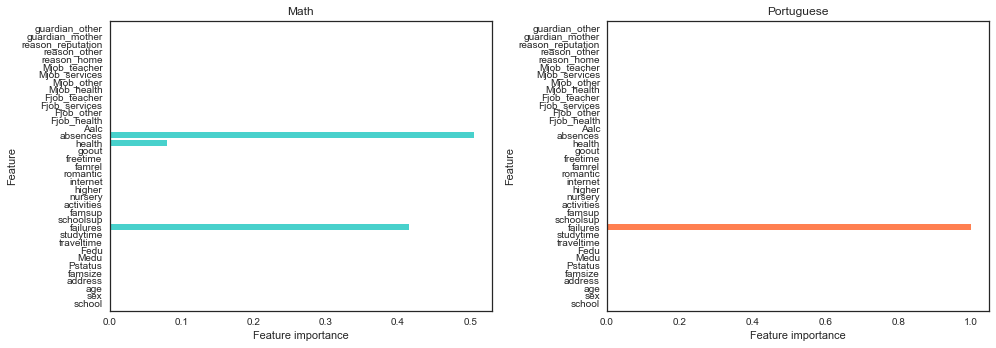

In [11]:
def plot_feature_importances_m(model):
    n_features = Xm.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center', color='#48D1CC')
    plt.yticks(np.arange(n_features), Xm.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Math")
    
def plot_feature_importances_p(model):
    n_features = Xp.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center', color='#FF7F50')
    plt.yticks(np.arange(n_features), Xp.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Portuguese")

fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
tree_m = DecisionTreeRegressor(max_depth=2).fit(Xm_train, ym_train)
plot_feature_importances_m (tree_m)

ax2 = plt.subplot(122)
tree_p = DecisionTreeRegressor(max_depth=1).fit(Xp_train, yp_train)
plot_feature_importances_p (tree_p)

plt.tight_layout()

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
def randomforest (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,20)}
    grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math

In [13]:
randomforest(Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.28
Best parameters: {'max_depth': 7}
Test score: 0.208953569778


Portuguese

In [14]:
randomforest(Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.27
Best parameters: {'max_depth': 5}
Test score: 0.237962540123


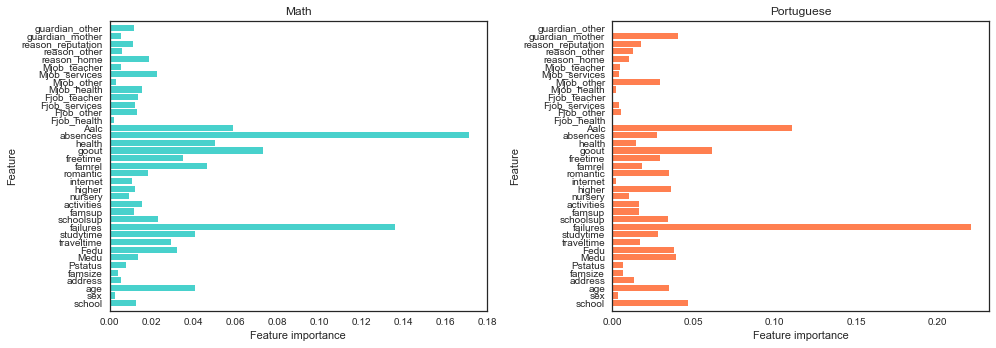

In [15]:
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
randomforest_m = RandomForestRegressor(max_depth=18).fit(Xm_train, ym_train)
plot_feature_importances_m (randomforest_m)

ax1 = plt.subplot(122)
randomforest_p = DecisionTreeRegressor(max_depth=13).fit(Xp_train, yp_train)
plot_feature_importances_p (randomforest_p)

plt.tight_layout()

### Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
def gradientboosting (X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': range(1,6),  'n_estimators':[10,100,1000]}
    grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math.

In [17]:
gradientboosting (Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.26
Best parameters: {'max_depth': 2, 'n_estimators': 100}
Test score: 0.266165635908


Portuguese.

In [18]:
gradientboosting (Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.31
Best parameters: {'max_depth': 1, 'n_estimators': 100}
Test score: 0.205073763807


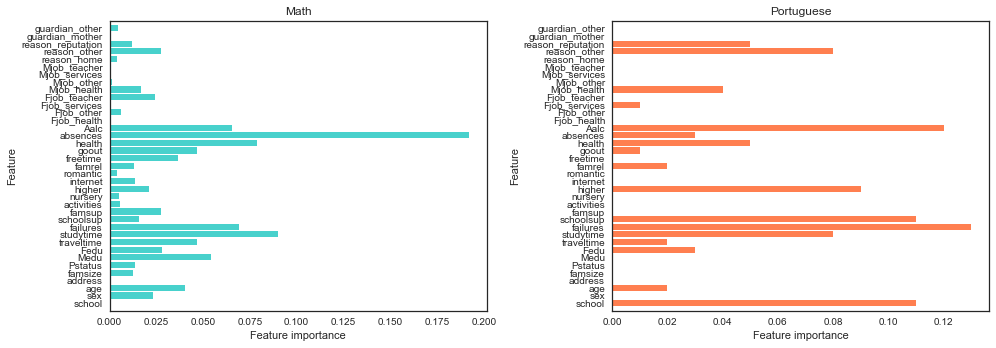

In [19]:
fig = plt.figure(figsize=(14,5))
ax1 = plt.subplot(121)
randomforest_m = GradientBoostingRegressor(max_depth=2, n_estimators=100).fit(Xm_train, ym_train)
plot_feature_importances_m (randomforest_m)

ax1 = plt.subplot(122)
randomforest_p = GradientBoostingRegressor(max_depth=1, n_estimators=100).fit(Xp_train, yp_train)
plot_feature_importances_p (randomforest_p)

plt.tight_layout()

### Further data preparation - scaling.

SVM, KNN, and linear models are very sensitive to the scaling of the data. There are several methods to transform the data that yield more standard ranges. In this project, I will use the MinMaxScaler that shifts the data such that all features are exactly between 0 and 1.

In particular, I scaled only the non-dummy variables in training dataset, and combined the scaled sub data set back to the dummy variables in the training data set. The same steps have been followed to the test dataset. So the datasets are ready for initial modeling. 

In [20]:
Xm_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'Aalc', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'],
      dtype='object')

In [21]:
#data transform
def scale (X):
    ### non scaled dataframe X --> scaled dataframe X
    #seperate dummy varialbes and nondummy variables for X_train and X_test
    X_nondummy = X[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
    X_dummy = X[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']]
    #select scaler
    scaler = MinMaxScaler()
    #scale nondummy variables
    scaler.fit(X_nondummy)
    X_nondummy_scaled = scaler.transform(X_nondummy)
    #concatenate scaled nondummy with nonscaled dummy variables
    X_scaled = np.concatenate((X_nondummy_scaled, X_dummy.values), axis=1)
    return X_scaled
#Apply to Xm_train, Xm_test, Xp_train, Xp_test
Xm_train_scaled = scale(Xm_train)
Xm_test_scaled = scale(Xm_test)
Xp_train_scaled = scale(Xp_train)
Xp_test_scaled = scale(Xp_test)

### KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
def knn (X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': range(1,100)}
    grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math

In [23]:
knn (Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.18
Best parameters: {'n_neighbors': 5}
Test score: 0.135781270078


Portuguese

In [24]:
knn (Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.15
Best parameters: {'n_neighbors': 22}
Test score: 0.198282262166


### Lasso Regression (L1 regulation)

In [25]:
from sklearn.linear_model import Lasso
def lassoreg (X_train, y_train, X_test, y_test):
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(Lasso(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math

In [26]:
lassoreg (Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.10
Best parameters: {'alpha': 0.1}
Test score: 0.181141365876


Portuguese

In [27]:
lassoreg (Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.27
Best parameters: {'alpha': 0.1}
Test score: 0.247773835985


### Ridge Regression (L2 regulation)

In [28]:
from sklearn.linear_model import Ridge
def ridgereg (X_train, y_train, X_test, y_test):
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid = GridSearchCV(Ridge(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math

In [29]:
ridgereg (Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.10
Best parameters: {'alpha': 100}
Test score: 0.203620927424


Portuguese

In [30]:
ridgereg (Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.26
Best parameters: {'alpha': 10}
Test score: 0.239855599843


### SVR

In [31]:
from sklearn.svm import SVR
def svr (X_train, y_train, X_test, y_test):
    param_grid = {'gamma': [1e-3,1e-1,1e0,1e1,1e10,1e50], 'C':[1e-3,1e-1,1e0,1e1,1e10,1e50]}
    grid = GridSearchCV(SVR(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print ('Best cross validation score: {:.2f}'.format(grid.best_score_))
    print ('Best parameters:', grid.best_params_)
    print ('Test score:', grid.score(X_test, y_test))

Math

In [32]:
svr (Xm_train, ym_train, Xm_test, ym_test)

Best cross validation score: 0.22
Best parameters: {'C': 10.0, 'gamma': 0.1}
Test score: 0.177813277139


Portuguese

In [33]:
svr (Xp_train, yp_train, Xp_test, yp_test)

Best cross validation score: 0.21
Best parameters: {'C': 10.0, 'gamma': 0.001}
Test score: 0.229876974616


### Result Summary

Results summary for Math.

|      | ML Technique     | CV Score | Test Score |Parameters                       |
|------|----------------  |----------------|----------------------------------------------|
|   1  	|Gradient Boosting Machines	|0.26|0.26|max_depth=2, n_nestimators=100|
| 2 |Ridge Regression	|0.10	|0.20|	alpha=100|
|3	|SVR	|0.22	|0.18	|kernel =rbf, gamma=0.1, C=10|
|4|	Lasso Regression|	0.10|	0.18|	alpha=0.1|
|   5  | Random Forest	  | 0.30	       |0.17	    |max_depth=18 |
| 6 | Decision Tree	|0.22	|0.15	|max_depth=2|
|7|	KNN|	0.18	|0.14|	n_neighbors=5|

Results summary for Portuguese.

|      | ML Technique     | CV Score | Test Score |Parameters                       |
|------|----------------  |----------------|----------------------------------------------|
|   1  | Random Forest	  | 0.28	       |0.25	    |max_depth=13 
| 2 |Ridge Regression	|0.27	|0.25|	alpha=0.1|
|3	|SVR	|0.21	|0.23	|kernel =rbf, gamma=0.001, C=10|
|   4  	|Gradient Boosting Machines	|0.31|0.21|max_depth=1, n_nestimators=100|
|5|	KNN|	0.15	|0.20|	n_neighbors=22|
|6|	Lasso Regression|	0.10|	0.18|	alpha=0.1|
| 7 | Decision Tree	|0.19	|0.15	|max_depth=1|

These models overall have weak predicting power, showing the highest test score of only 0.26. However from the feature importance graph generated by tree models, in both classes Aalc, health, studytime, goout, absences, and failures are important features. 

Some predictors variables maybe cross correlated. For example, alcohol consumption (Aalc) and healthy staus (health) are correlated, and they are both important features in both classes for determing G3. Students who have fewer absences (absences) may have fewer failures (failures) in the past, and may also have longer study time (studytime) and stronger motivation to pursue higher education (schoolup). The correlation among predictor varialbes themselves may explain the low predicting power. Feature selection would be the next step to improve the models.

### Reference

Hingson, R.W.; Zha, W.; and Weitzman, E.R. Magnitude of and trends in alcohol-related mortality and morbidity among U.S. college students ages 18–24, 1998–2005. Journal of Studies on Alcohol and Drugs (Suppl. 16):12–20, 2009. PMID: 19538908 http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2701090/

http://www.cehd.umn.edu/fsos/projects/alcohol/consequences.asp

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

F. Pagnotta, H.M. Amran. Using Data Mining To Predict Secondary School Student Alcohol Consumption. , Department of Computer Science,University of Camerino.
